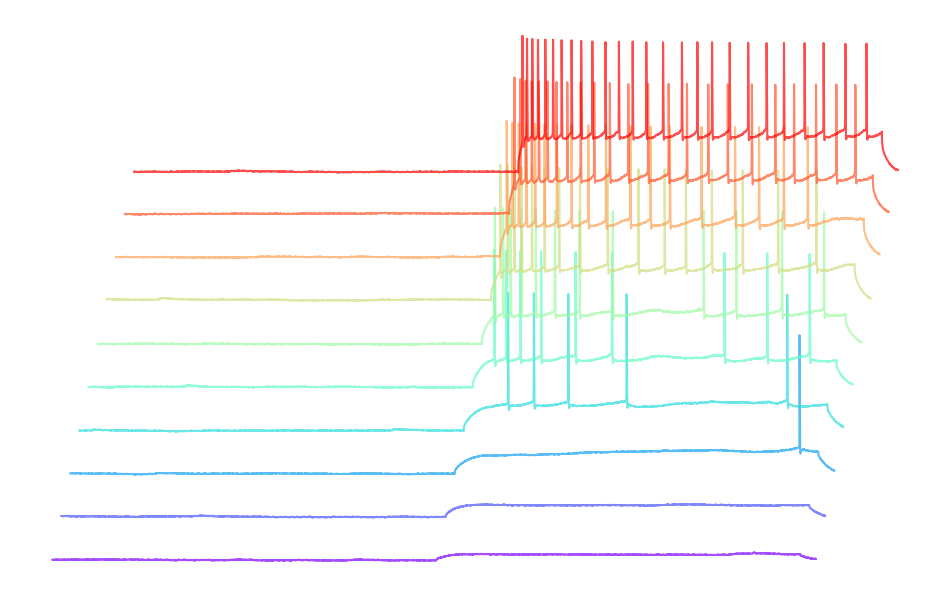

In [11]:
import pyabf
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the project path and ABF file name
project_path = 'C:\\Users\\ikmor\\OneDrive\\Documents\\SNR AND OBR pilot study\\'
file_name = 'DS4 ACCOM.abf'

# Function to plot specified time segment with different colors for each sweep
def plot_time_segment(start_time, end_time):
    # Load the ABF file
    abf = pyabf.ABF(f'{project_path}{file_name}')

    plt.figure(figsize=(12, 7.5))
    
    # Generate a color map with as many colors as there are sweeps
    colors = plt.cm.rainbow(np.linspace(0, 1, len(abf.sweepList)))
    
    for idx, sweepNumber in enumerate(abf.sweepList):
        abf.setSweep(sweepNumber)
        
        # Convert time to sample indices
        i1 = int(start_time * abf.sampleRate)
        i2 = int(end_time * abf.sampleRate)
        
        # Ensure i2 doesn't exceed the sweep length
        i2 = min(i2, len(abf.sweepX))
        
        dataX = abf.sweepX[i1:i2] + .025 * sweepNumber
        dataY = abf.sweepY[i1:i2] + 35 * sweepNumber
        
        # Use a different color for each sweep
        plt.plot(dataX, dataY, color=colors[idx], alpha=0.7)

    plt.gca().axis('off')  # hide axes to enhance floating effect
    # plt.title(f'Time segment: {start_time}s to {end_time}s')
    plt.show()

# Example usage:
# Plot the segment from 3 to 5 seconds
plot_time_segment(2.1, 4.2)

# Plot the segment from 2 to 3 seconds
# plot_time_segment(2, 3)